In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
df=load_iris()

In [3]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# creating data frames
x=pd.DataFrame(data=df.data,columns=df.feature_names)
y=pd.DataFrame(data=df.target,columns=['species'])

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
print(xtrain.head())
print(ytrain.head())
print(xtest.head())
print(ytest.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
119                6.0               2.2                5.0               1.5
43                 5.0               3.5                1.6               0.6
104                6.5               3.0                5.8               2.2
17                 5.1               3.5                1.4               0.3
149                5.9               3.0                5.1               1.8
     species
119        2
43         0
104        2
17         0
149        2
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
29                4.7               3.2                1.6               0.2
56                6.3               3.3                4.7               1.6
27                5.2               3.5                1.5               0.2
75                6.6               3.0                4.4               1.4
95                5.7               3.0                4.2           

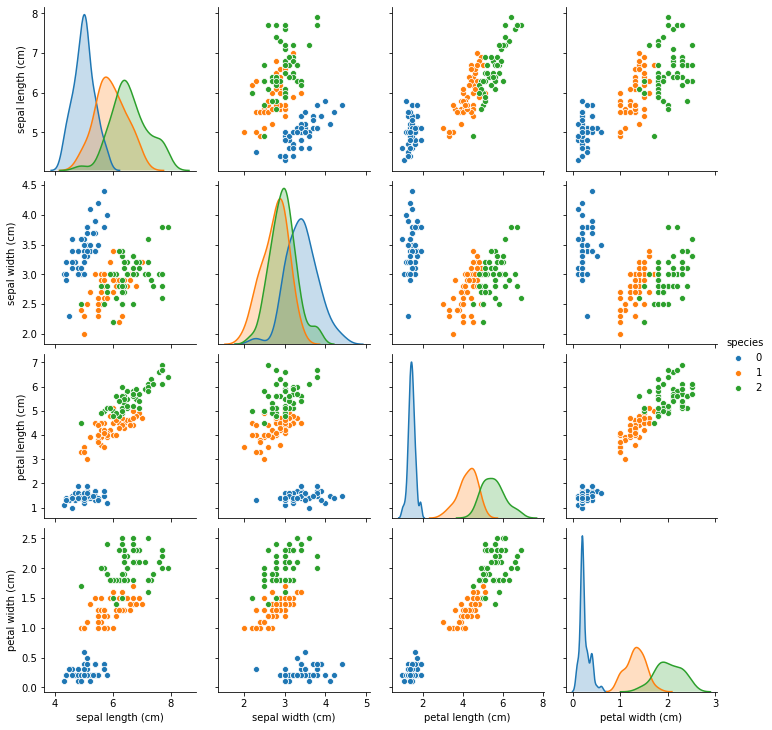

In [7]:
k=[x,y]
h=pd.concat(k,axis=1)
sns.pairplot(h,hue='species')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_feature=scaler.transform(x)
scaled_feature

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
df_feature=pd.DataFrame(data=scaled_feature,columns=df.feature_names)
df_feature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [33]:
# building the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

C:\Users\colourfulm\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
from sklearn.metrics import accuracy_score
ypred=knn.predict(xtest)


In [35]:
accuracy_score(ytest,ypred)

0.9473684210526315

In [15]:
# Choosing K value
accuracy_rate=[]



In [16]:
from sklearn.model_selection import cross_val_score
for i in range(2,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feature,h['species'],cv=10)
    accuracy_rate.append(score.mean())

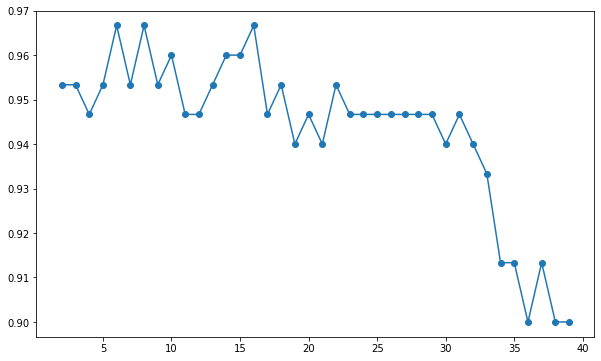

In [18]:
# building elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(2,40),accuracy_rate,marker='o')

In [30]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(xtrain,ytrain)
knn_pred=knn.predict(xtest)

C:\Users\colourfulm\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [31]:
accuracy_score(ytest,knn_pred)

0.9210526315789473